# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

K-Means Clustering merupakan metode pengelompokan data yang bertujuan memisahkan data ke dalam beberapa kelompok (cluster) berdasarkan kemiripan fitur. Data dengan karakteristik serupa akan ditempatkan dalam satu kelompok, sementara data yang berbeda akan dikelompokkan ke dalam klaster lain. Proses pengelompokan ini menggunakan centroid (titik pusat) sebagai referensi dalam menentukan keanggotaan tiap data pada suatu klaster. Tujuannya adalah untuk memastikan bahwa data yang memiliki kesamaan berada dalam kelompok yang sama, dan data yang berbeda tersebar di kelompok yang berbeda.


## **Manfaat *Clustering***

* Clustering berperan penting dalam segmentasi data, yang sangat bermanfaat untuk analisis dan pemecahan berbagai masalah bisnis, seperti segmentasi pelanggan, strategi pemasaran, dan pemetaan wilayah.

* Juga digunakan dalam pengenalan objek di berbagai bidang seperti computer vision dan image processing.

Hasil clustering yang optimal akan menunjukkan tingkat kemiripan yang tinggi antar anggota dalam satu klaster, dan perbedaan yang signifikan antar klaster yang berbeda. Kesamaan yang dimaksud dinilai secara numerik, di mana dua objek dianggap semakin mirip jika nilai ukurannya semakin dekat. Sebaliknya, semakin besar perbedaan nilai, maka semakin rendah tingkat kesamaan. Oleh karena itu, kualitas clustering sangat ditentukan oleh metode yang digunakan.




##**Inertia (Sum of Squared Error/SSE)**


Dalam algoritma K-Means Clustering, inertia atau SSE (Sum of Squared Error) merupakan salah satu ukuran evaluasi yang digunakan untuk menentukan seberapa baik pengelompokan data ke dalam klaster. Metrik ini menghitung total jumlah kuadrat jarak antara setiap data dengan pusat klaster (centroid) tempat data tersebut tergabung.

Rumus dari inertia adalah:


**Inertia
=
∑
𝑖
=
1
𝑛
∥
𝑥
𝑖
−
𝜇
𝑐
𝑖
∥
2
Inertia=
i=1
∑
n
​
 ∥x
i
​
 −μ
c
i
∥
2**


**Penjelasan Notasi**

* x
i
​
 : Titik data ke-
𝑖
i

* 𝜇
𝑐
𝑖
μ
c
i : Titik pusat (centroid) dari klaster yang berisi
𝑥
𝑖
x
i
​
* ∥
𝑥
𝑖
−
𝜇
𝑐
𝑖
∥
2
∥x
i
​
 −μ
c
i 2: Jarak kuadrat antara data
𝑥
𝑖
x
i
​
  dan centroid-nya menggunakan jarak Euclidean

* 𝑛
n: Total jumlah dat



## **Silhouette Analysis**

Silhouette Analysis adalah metode evaluasi yang sering dianggap lebih informatif dibandingkan inertia dalam menilai kualitas hasil clustering, terutama pada algoritma seperti K-Means. Ini karena metrik ini memperhitungkan dua aspek penting sekaligus:

* Kepadatan internal dalam klaster (cohesion)

* Jarak antar klaster yang berbeda (separation)

Silhouette Analysis menilai sejauh mana sebuah titik data cocok berada dalam klaster tempatnya berada dibandingkan dengan klaster terdekat lainnya. Rumus yang digunakan adalah:


$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$


**Penjelasan Notasi**:
* 𝑎
(
𝑖
)
a(i): Rata-rata jarak dari titik
𝑖
i ke seluruh titik lain dalam klaster yang sama (ukuran kohesi).

* 𝑏
(
𝑖
)
b(i): Rata-rata jarak dari titik
𝑖
i ke semua titik dalam klaster terdekat yang bukan klasternya (ukuran pemisahan).

* 𝑠
(
𝑖
)
s(i): Nilai silhouette untuk titik
𝑖
i, berkisar antara -1 hingga 1.


**Interpretasi Nilai s(i):**
* 𝑠
(
𝑖
)
s(i):
𝑠
(
𝑖
)
≈
1
s(i)≈1: Titik sangat sesuai dengan klasternya dan jauh dari klaster lain.

* 𝑠
(
𝑖
)
≈
0
s(i)≈0: Titik berada di batas antara dua klaster.

* 𝑠
(
𝑖
)
≈
−
1
s(i)≈−1: Titik mungkin dikelompokkan ke klaster yang salah.



Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah data keseluruhan
- $S$: Skor rata-rata silhouette dari seluruh titik data


## Implementasi dengan menggunakan data Iris

In [24]:
%pip install pymysql
%pip install psycopg2

## Library yang digunakan

In [25]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [26]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-29vania-vaniaptr008-f94a.k.aivencloud.com",
        user="avnadmin",
        password="AVNS_jN7GWD4QIOAFWBZiFM2",
        database="defaultdb",
        port=12525
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")  # Pastikan tabel ini ada!
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-25907135-mysqql.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_-_iUzbq84ojauwfvOBS",
        database="defaultdb",
        port=12005
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_mysql")  # Pastikan tabel ini ada!
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)
# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          14.0          2.0          51.0         35.0
  2     Iris-setosa          14.0          2.0          49.0         30.0
  3     Iris-setosa          13.0          2.0          47.0         32.0
  4     Iris-setosa          15.0          2.0          46.0         31.0
  5     Iris-setosa          14.0          2.0           5.0         36.0
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1          94.0          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## Data asli sebelum di normalisasi

Ini adalah data sebelum normalisasi

In [27]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal_length  petal_width  sepal_length  sepal_width
         14.0          2.0          51.0         35.0
         14.0          2.0          49.0         30.0
         13.0          2.0          47.0         32.0
         15.0          2.0          46.0         31.0
         14.0          2.0           5.0         36.0
          1.7          0.4           5.4          3.9
          1.4          0.3           4.6          3.4
          1.5          0.2           5.0          3.4
          1.4          0.2           4.4          2.9
          1.5          0.1          94.0          3.1
          1.5          0.2           5.4          3.7
          1.6          0.2           4.8          3.4
          1.4          0.1           4.8          3.0
          1.1          0.1           4.3          3.0
          1.2          0.2           5.8         40.0
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

## Visualisasi data

### Visualisasi data asli tanpa menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

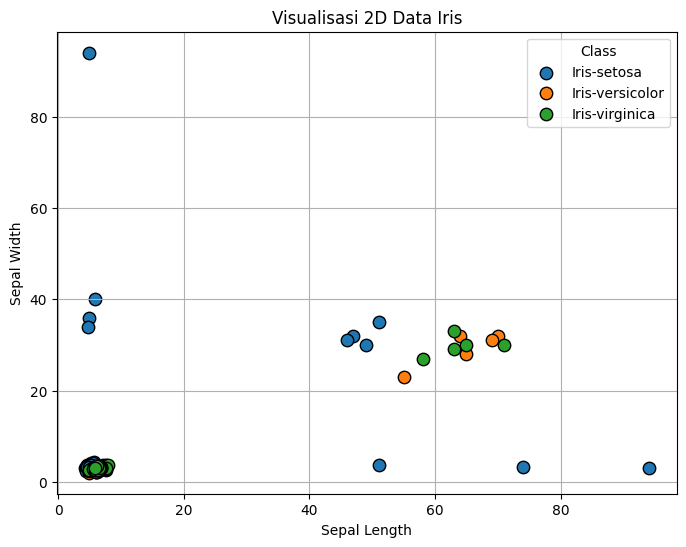

In [28]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


Ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

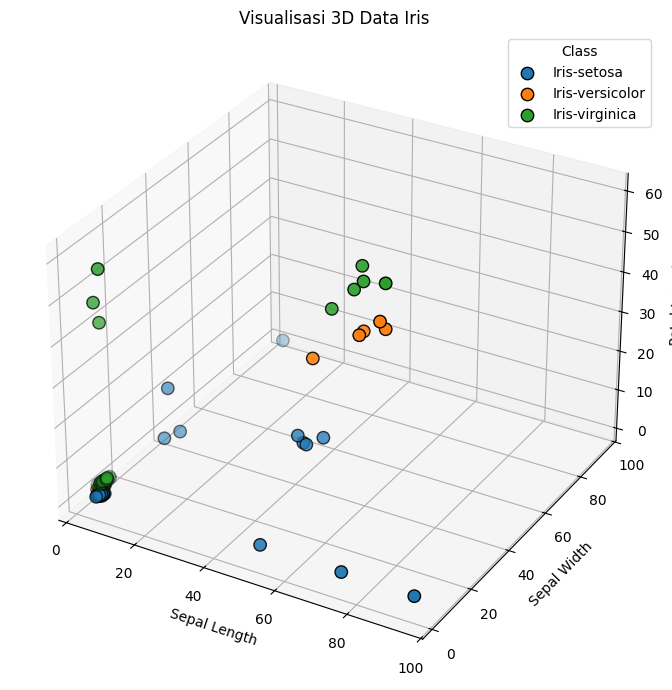

In [29]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi menggunakan PCA

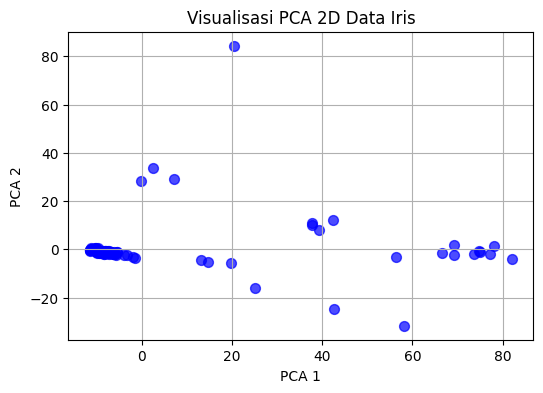

In [30]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi menggunakan PCA

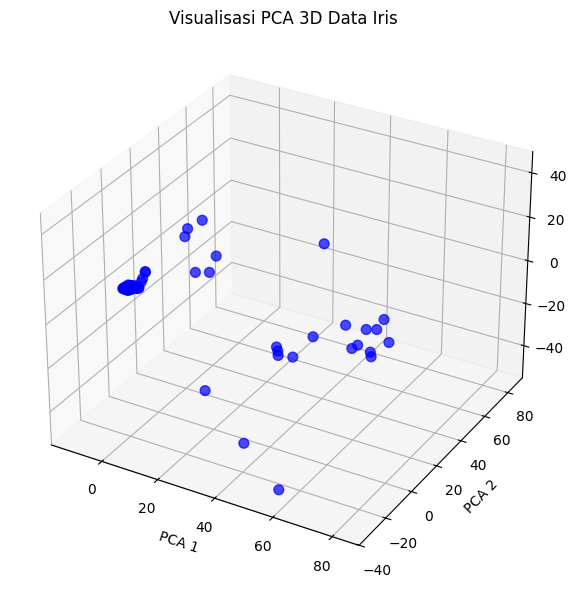

In [31]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


### Standarisasi dengan menggunakan MinMaxScaler

Dalam proses ini, saya menggunakan MinMaxScaler untuk melakukan normalisasi data. Tujuannya adalah untuk menyamakan skala semua fitur, karena fitur-fitur dalam dataset memiliki rentang nilai yang berbeda-beda. Jika tidak dinormalisasi, model machine learning — terutama yang sensitif terhadap jarak seperti KNN atau SVM — bisa menjadi bias terhadap fitur dengan nilai yang lebih besar.

MinMaxScaler bekerja dengan cara mengubah nilai-nilai pada setiap fitur ke dalam rentang antara 0 dan 1, berdasarkan nilai minimum dan maksimum dari masing-masing fitur. Dengan skala yang seragam, model dapat memproses semua fitur secara adil, tanpa keberpihakan pada fitur tertentu. Setelah data dinormalisasi, saya melakukan reduksi dimensi menggunakan PCA untuk menyederhanakan data menjadi 3 dimensi utama yang mewakili variasi data secara keseluruhan.

Dari proses ini, saya melihat bahwa model menjadi lebih stabil dan hasilnya lebih baik. Ini menunjukkan bahwa normalisasi bukan hanya langkah teknis biasa, tapi bagian penting dalam menyiapkan data agar model dapat belajar secara optimal dan memberikan hasil yang lebih akurat.

In [32]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [33]:
print (scaled_features);

[[0.22033898 0.04534606 0.5206243  0.35869565]
 [0.22033898 0.04534606 0.49832776 0.30434783]
 [0.20338983 0.04534606 0.47603122 0.32608696]
 [0.23728814 0.04534606 0.46488294 0.31521739]
 [0.22033898 0.04534606 0.00780379 0.36956522]
 [0.01186441 0.0071599  0.0122631  0.02065217]
 [0.00677966 0.00477327 0.00334448 0.01521739]
 [0.00847458 0.00238663 0.00780379 0.01521739]
 [0.00677966 0.00238663 0.00111483 0.00978261]
 [0.00847458 0.         1.         0.01195652]
 [0.00847458 0.00238663 0.0122631  0.01847826]
 [0.01016949 0.00238663 0.00557414 0.01521739]
 [0.00677966 0.         0.00557414 0.01086957]
 [0.00169492 0.         0.         0.01086957]
 [0.00338983 0.00238663 0.01672241 0.41304348]
 [0.00847458 0.0071599  0.01560758 0.02608696]
 [0.00508475 0.0071599  0.0122631  0.02065217]
 [0.00677966 0.00477327 0.00891862 0.01630435]
 [0.01186441 0.00477327 0.01560758 0.01956522]
 [0.00847458 0.00477327 0.5206243  0.01956522]
 [0.01186441 0.00238663 0.0122631  0.01521739]
 [0.00847458 

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Disini Saya menggunakan algoritma KMeans untuk membagi data menjadi 2 klaster. Proses ini dilakukan pada data yang sudah dinormalisasi, dengan random_state=42 agar hasilnya konsisten, dan n_init=10 untuk memilih hasil klasterisasi terbaik dari beberapa inisialisasi.

Setelah klasterisasi, saya mengevaluasi hasilnya menggunakan dua metrik: inertia dan silhouette score. Inertia mengukur seberapa rapat data dalam klaster, sedangkan silhouette score menunjukkan seberapa baik pemisahan antar klaster. Nilai yang baik menunjukkan bahwa pembagian klaster cukup jelas.

Terakhir, saya membuat visualisasi hasil klasterisasi dalam bentuk scatter plot 2 dimensi berdasarkan hasil PCA. Warna pada grafik mewakili masing-masing klaster, sehingga memudahkan dalam melihat pola atau pemisahan antar kelompok data.

[2 Clusters] Inertia: 8.6059, Silhouette Score: 0.8139


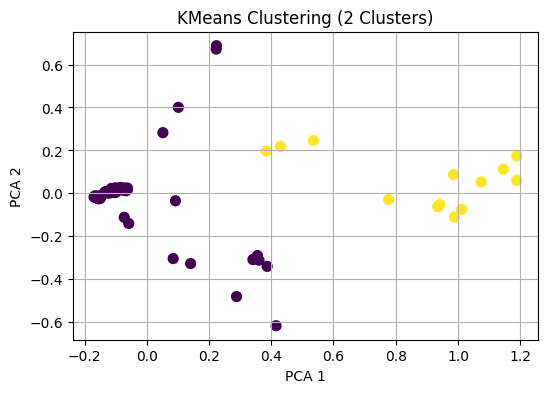

In [34]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 8.6059, Silhouette Score: 0.8139


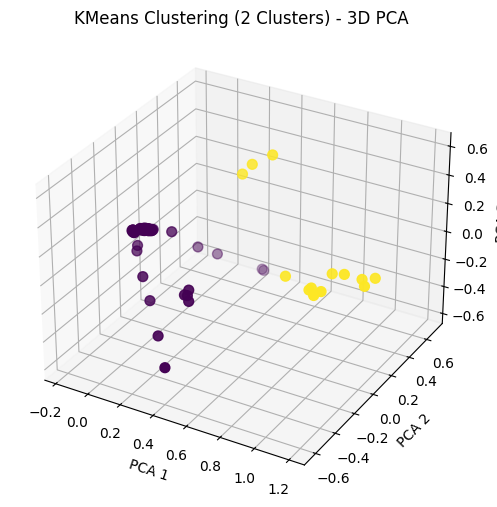

In [35]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Pada tahap ini, saya menerapkan algoritma KMeans untuk membagi data menjadi 3 klaster. Proses ini dilakukan pada data yang telah dinormalisasi sebelumnya. Dengan mencoba beberapa inisialisasi, algoritma memilih hasil klasterisasi yang paling optimal.

Setelah data terbagi, saya mengevaluasi hasilnya menggunakan dua metrik: inertia dan silhouette score. Inertia mengukur seberapa rapat data dalam satu klaster, sementara silhouette score menunjukkan seberapa baik pemisahan antar klaster. Kedua metrik ini membantu menilai apakah pembagian menjadi 3 klaster cukup efektif.

Terakhir, saya memvisualisasikan hasilnya dalam bentuk scatter plot dua dimensi menggunakan data hasil reduksi PCA. Titik-titik pada grafik diwarnai berdasarkan klaster, sehingga pola dan pemisahan antar kelompok dapat terlihat dengan jelas.

[3 Clusters] Inertia: 5.9989, Silhouette Score: 0.8059


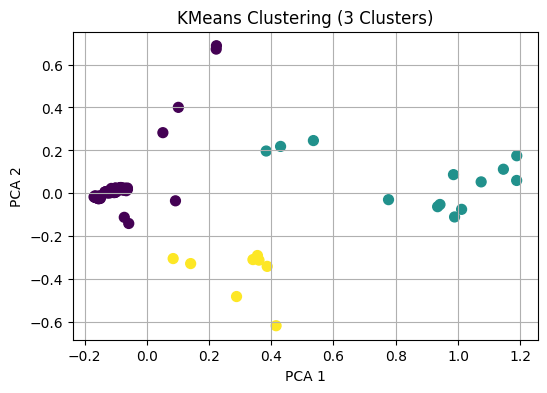

In [36]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 5.9989, Silhouette Score: 0.8059


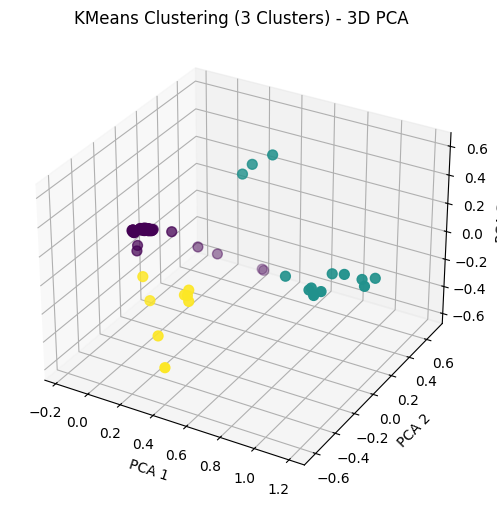

In [37]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Saya menggunakan algoritma KMeans untuk membagi data menjadi 4 kelompok berdasarkan kemiripan nilai. Data yang digunakan sudah dinormalisasi agar hasilnya lebih seimbang.

Untuk mengecek hasilnya, saya menghitung inertia dan silhouette score. Nilai ini membantu melihat seberapa baik data dikelompokkan dan seberapa jelas batas antar kelompok.

Hasil klaster kemudian divisualisasikan dalam grafik dua dimensi menggunakan PCA. Setiap titik diberi warna sesuai klasternya, sehingga pola pembagian data bisa terlihat dengan jelas.

[4 Clusters] Inertia: 3.9895, Silhouette Score: 0.8310


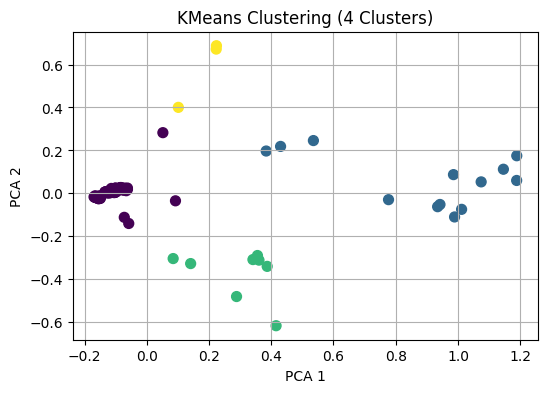

In [38]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 3.9895, Silhouette Score: 0.8310


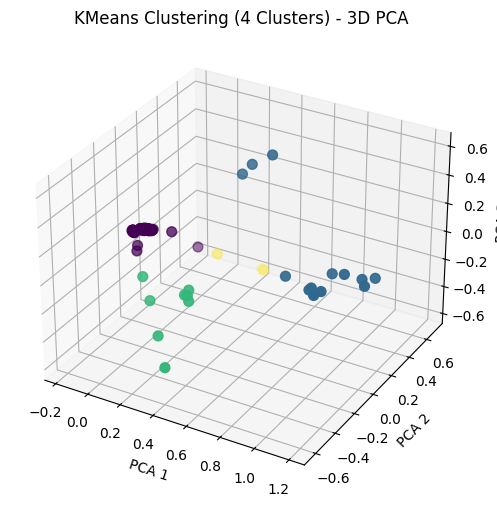

In [39]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
